<a href="https://colab.research.google.com/github/AzadiNoor/Art-Exhibitions_Analusis_Notebook.ipynb/blob/main/Art_Exhibitions_Analusis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##step 1:load the data



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##step 2:load the data

In [46]:
df = pd.read_csv('Exhibitions.csv')
output = []
output.append('Exploratory Data Analysis of Exhibitions.csv\n')
output.append("==============================================\n")


##step 3:load the data


In [20]:
print(df.head())
output.append(f"first few rows:\n{df.head()}\n")

         Date      Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-09-15     Painting   West       Artists        28  797.86      0.16   
1  2024-04-01    Sculpture   West       Artists        26  115.05      0.20   
2  2024-08-07  Photography  North       Artists        47    5.83      0.06   
3  2024-02-18  Photography   East       Artists        99  925.56      0.27   
4  2024-03-09    Sculpture  North       Artists         5  575.64      0.16   

    Revenue  
0  18765.67  
1   2393.04  
2    257.57  
3  66890.22  
4   2417.69  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [24]:
df.dropna(inplace=True)

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
print(df.describe())
output.append(f"Summary statitis\n{df.describe()}\n")

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     49.238000   500.472480     0.152090  21178.079410
std      28.667598   284.930573     0.087507  18898.143528
min       1.000000     5.170000     0.000000     57.540000
25%      24.000000   256.217500     0.080000   5260.627500
50%      49.000000   500.990000     0.160000  15531.900000
75%      74.000000   733.687500     0.230000  33438.992500
max     100.000000   997.150000     0.300000  99008.000000


##step 4:load the data



In [ ]:
output.append(f"Data Cleaning Result\n")
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n {missing_values}\n")

In [22]:
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}\n ")
df.drop_duplicates(inplace=True)

##step 5:load the data

In [29]:
total_revenue = df['Revenue'].sum()
output.append(f'Total Revenue:${total_revenue}\n')
print(f'Total Revenue:${total_revenue}')

Total Revenue:$21178079.41


In [37]:
average_price_per_Service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price Per Customer Type:\n")
output.append(f"{average_price_per_Service}\n")
print(average_price_per_Service)

Customer_Type
Artists     505.959239
Visitors    495.284611
Name: Price, dtype: float64


In [38]:
total_Services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_Services_by_region}\n")
print(total_Services_by_region)

Region
North    272
East     255
West     243
South    230
Name: count, dtype: int64


In [39]:
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     129392.24
North    129081.03
South    115742.57
West     126256.64
Name: Price, dtype: float64


##step 6:visualize the data


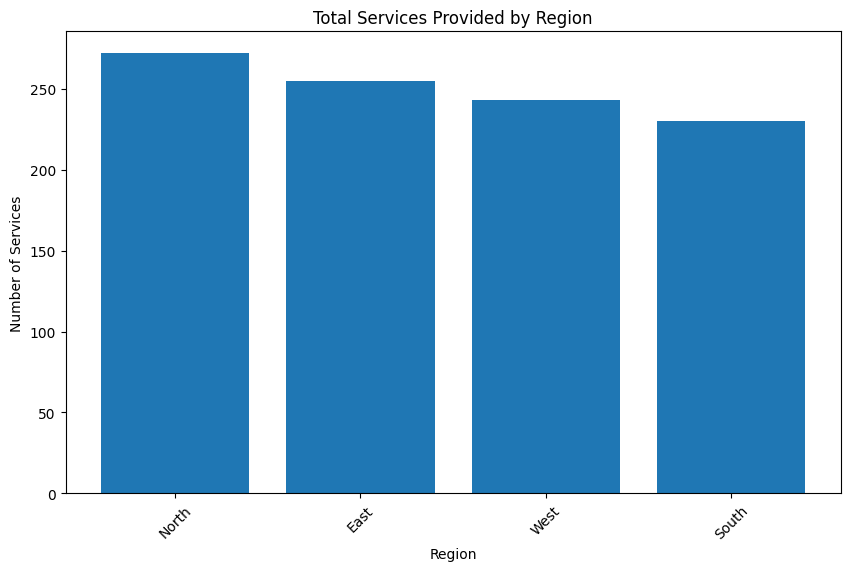

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(total_Services_by_region.index, total_Services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_Services_by_region.png')
plt.show()

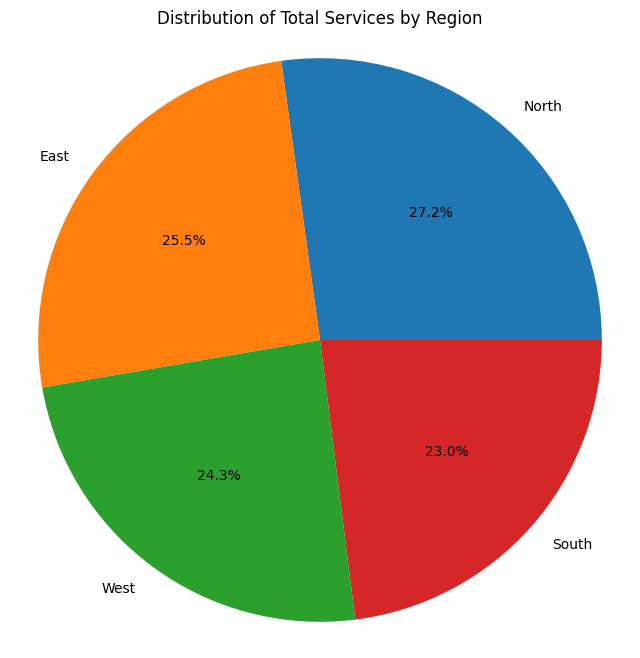

In [41]:
plt.figure(figsize=(8,8))
plt.pie(total_Services_by_region, labels=total_Services_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of Total Services by Region')
plt.axis('equal')
plt.savefig('Service_distribution_by_region.png')
plt.show()

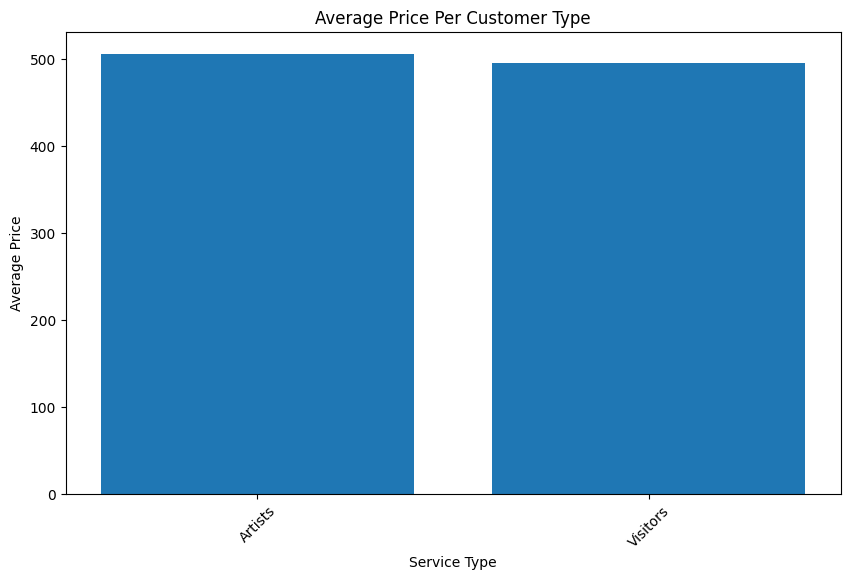

In [44]:
plt.figure(figsize=(10,6))
plt.bar(average_price_per_Service.index, average_price_per_Service.values)
plt.title('Average Price Per Customer Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_Service.png')
plt.show()

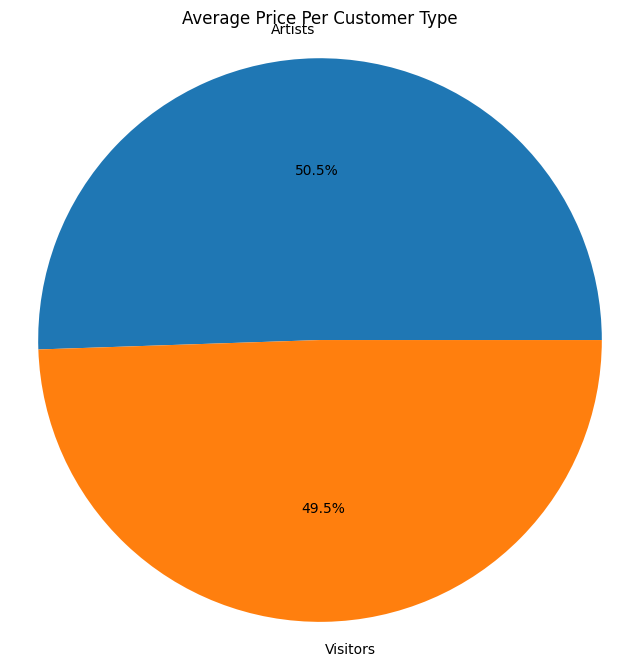

In [45]:
plt.figure(figsize=(8,8))
plt.pie(average_price_per_Service, labels=average_price_per_Service.index, autopct='%1.1f%%')
plt.title('Average Price Per Customer Type')
plt.axis('equal')
plt.savefig('average_price_per_Service.png')
plt.show()

## save output to text

In [48]:
with open('analysis_output.txt', 'w') as file:
    file.writelines(output)